In [1]:
# Lets use a simple decision Tree to study a 2d version of the iris data


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import numpy as np


In [24]:
iris = load_iris()
X = iris.data[:,2:] # 2d collect just petal length and widht
y = iris.target
x1label = iris.feature_names[2:][0]
x2label = iris.feature_names[2:][1]


In [41]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(max_depth=2)

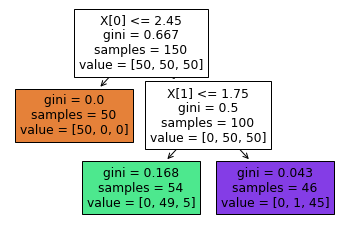

In [42]:
# Plottint 1:
plt.figure()
plot_tree(tree_clf.fit(X,y), filled=True)
plt.show()

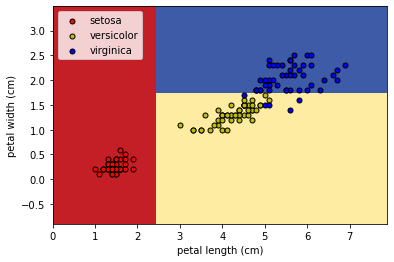

In [43]:
# Plotting 2:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=25)

plt.legend()
plt.xlabel(x1label)
plt.ylabel(x2label)
plt.show()

In [12]:
# predictions:
x1new = 5. # cm long
x2new = 1.5 # cm wide

print(tree_clf.predict_proba([[x1new,x2new]]))
print(tree_clf.predict([[x1new,x2new]]))
print()

x3new = 6. # cm long
x4new = 1.5 # cm wide

print(tree_clf.predict_proba([[x3new,x4new]]))
print(tree_clf.predict([[x3new,x4new]]))

# The probabiities should be the same for both cases since they are sitting in the same "box"
# defined by the tree 


[[0.         0.90740741 0.09259259]]
[1]

[[0.         0.02173913 0.97826087]]
[2]


In [46]:
# Accuracy
# We can see in the plot that we didn't do a perfct job. Lets see the accuracy in the training set
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X)
print(tree_clf.__class__.__name__,accuracy_score(y,y_pred))

# 0.96 is pretty good accually. Check it out the other methods I have around my git hub. Later we will define
# a voting system that uses all of them and we can see how that increases accuracy.


DecisionTreeClassifier 0.96


In [53]:
# Random Forest: an ensamble of Decision Trees above 
# we basically use many decision trees trained using bagging method (you will have to look that up)
# RAndom Forest results in a greater diversity since it searches for the best feature among a random subset of features. This is in
# contrast to a simple tree where we look for the best feature when splitting a node.
# max_samples = set the size of traning set 
# use RandomForestClassifer directly and it is already optimized for decision Trees
#Next we use 500 tress (n_estimators) and take advantage of 2 cores of your cpu (n_jobs)
# We use max_leaf_nodes = 7 to make results very different than the ones just obtained. We are likely to overfit here =x

In [57]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500,max_leaf_nodes =7,n_jobs = 2)
rnd_clf.fit(X,y)

RandomForestClassifier(max_leaf_nodes=7, n_estimators=500, n_jobs=2)

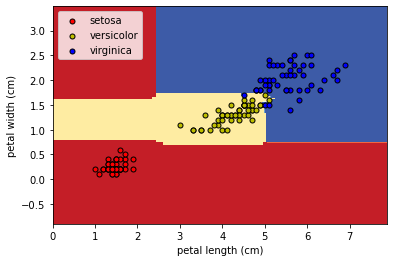

In [60]:
# Plotting 3:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=25)

plt.legend()
plt.xlabel(x1label)
plt.ylabel(x2label)
plt.show()

In [59]:
y_pred_rf = rnd_clf.predict(X)
print(rnd_clf.__class__.__name__,accuracy_score(y,y_pred_rf))
# the precision is now almost 100%. But rember we have set max_leaf_nodes =7.

RandomForestClassifier 0.9933333333333333
